In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
from catboost import CatBoostRegressor
from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator

In [29]:
import pandas as pd

In [30]:
import numpy as np

In [31]:
import matplotlib.pyplot as plt

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
import yfinance as yf

In [35]:
!pip install catboost


In [36]:
from catboost import CatBoostRegressor
print("CatBoost is successfully imported.")


CatBoost is successfully imported.


In [37]:
from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator

In [38]:
# Step 1: Download stock data (Replace 'AAPL' with your desired stock ticker)
print("Fetching stock data...")
ticker = "BTC-USD"
stock_data = yf.download('RELIANCE.BO', period='1y', interval='1d')  # Max 4 years of daily data
stock_data = stock_data.reset_index()


Fetching stock data...


[*********************100%***********************]  1 of 1 completed


In [39]:
# Step 2: Ensure the data contains 'Close' prices
if 'Close' not in stock_data.columns:
    raise ValueError("The data must contain a 'Close' column for closing prices.")

In [40]:
# Step 3: Calculate RSI
print(stock_data.info())
stock_data['Close'] = stock_data['Close'].fillna(method='ffill').fillna(method='bfill')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   (Date, )                  245 non-null    datetime64[ns]
 1   (Adj Close, RELIANCE.BO)  245 non-null    float64       
 2   (Close, RELIANCE.BO)      245 non-null    float64       
 3   (High, RELIANCE.BO)       245 non-null    float64       
 4   (Low, RELIANCE.BO)        245 non-null    float64       
 5   (Open, RELIANCE.BO)       245 non-null    float64       
 6   (Volume, RELIANCE.BO)     245 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.5 KB
None


In [41]:
# Step 4: Calculate SMA
print("Calculating SMA...")
sma = SMAIndicator(close=stock_data['Close'], window=20)
# Calculate SMA using pandas rolling window
stock_data['SMA'] = stock_data['Close'].rolling(window=20).mean()

Calculating SMA...


In [42]:
# Step 5: Calculate Support and Resistance (basic approach)
print("Calculating Support and Resistance levels...")
stock_data['Support'] = stock_data['Close'].rolling(window=20).min()
stock_data['Resistance'] = stock_data['Close'].rolling(window=20).max()

Calculating Support and Resistance levels...


In [43]:
# Step 6: Prepare data for regression
print("Preparing data for regression...")
stock_data['Day'] = np.arange(len(stock_data))  # Numerical index for regression
X = stock_data[['Day']]  # Feature
y = stock_data['Close']  # Target

Preparing data for regression...


In [44]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Step 8: Train CatBoost Regressor model
print("Training CatBoost model...")
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)

Training CatBoost model...


In [46]:
# Step 9: Predictions
y_pred = model.predict(X_test)

In [47]:
# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.10f}")  # Display very low MSE for precision
print(f"R-squared Error: {r2 * 100:.2f}%")  # Display R-squared as percentage

Mean Squared Error: 345.8666907174
R-squared Error: 96.25%


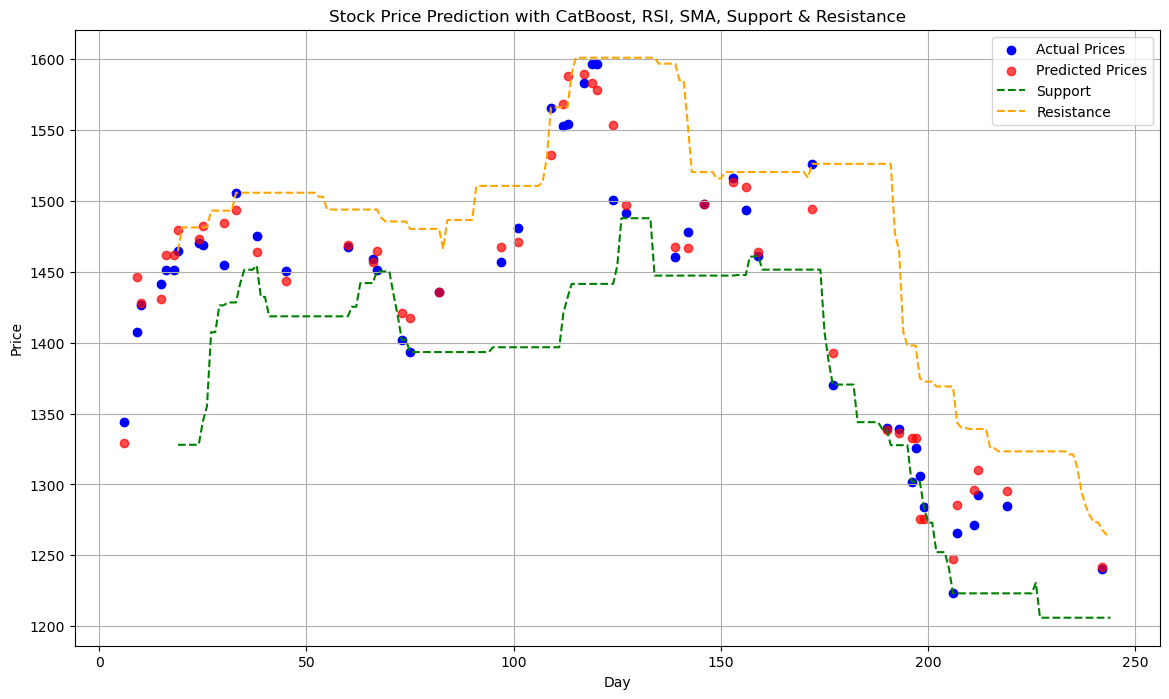

In [48]:
# Step 11: Plot Scatter Plot with Regression Line
plt.figure(figsize=(14, 8))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')  # Actual prices
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices', alpha=0.7)  # Predicted prices
plt.plot(stock_data['Day'], stock_data['Support'], color='green', linestyle='--', label='Support')  # Support
plt.plot(stock_data['Day'], stock_data['Resistance'], color='orange', linestyle='--', label='Resistance')  # Resistance
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Stock Price Prediction with CatBoost, RSI, SMA, Support & Resistance')
plt.legend()
plt.grid()
plt.show()

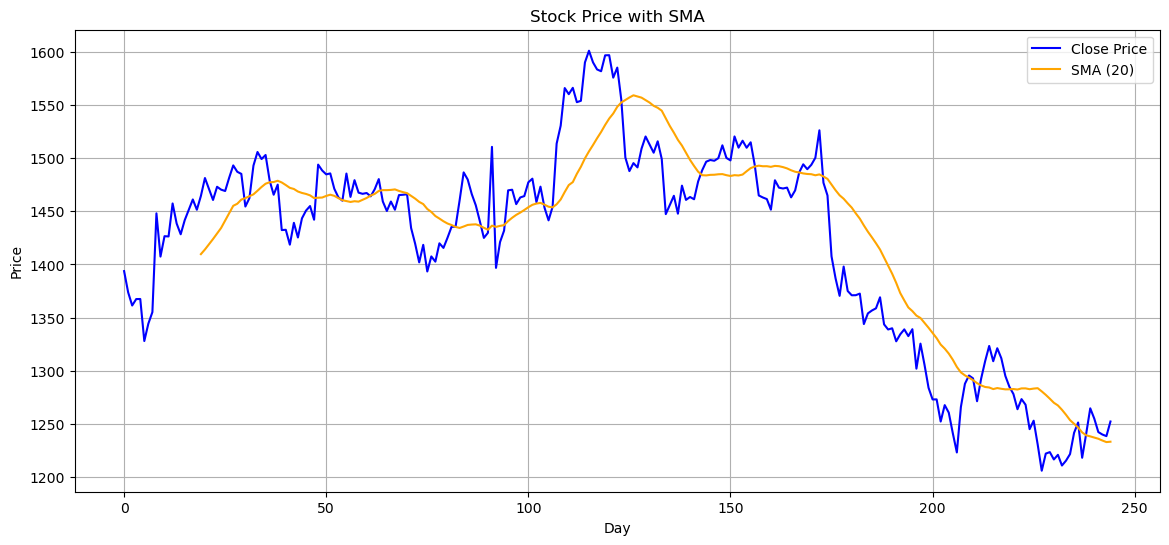

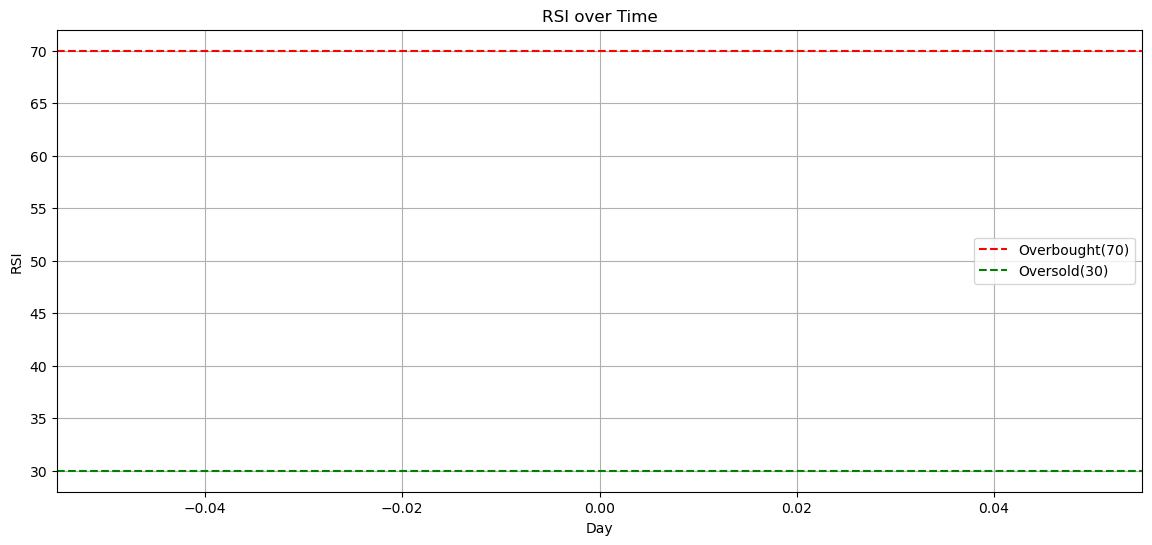

In [49]:
# Step 12: Display RSI and SMA
plt.figure(figsize=(14, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['SMA'], label='SMA (20)', color='orange')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Stock Price with SMA')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought(70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold(30)')
plt.xlabel('Day')
plt.ylabel('RSI')
plt.title('RSI over Time')
plt.legend()
plt.grid()
plt.show()